# Python EDA for MIS Project

In [29]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

dim_category = pd.read_csv("/content/dim_category.csv")
dim_customer = pd.read_csv("/content/dim_customer.csv")
dim_date = pd.read_csv("/content/dim_date.csv")
dim_product = pd.read_csv("/content/dim_product.csv")
dim_region = pd.read_csv("/content/dim_region.csv")
dim_salesperson = pd.read_csv("/content/dim_salesperson.csv")
dim_target= pd.read_csv("/content/dim_target.csv")
fact_sales_transaction = pd.read_csv("/content/fact_sales_transactions.csv")

print("Data set loaded successfully")

Data set loaded successfully


In [30]:
dim_category.isnull().sum()

,0
category_id,0
category_name,0


In [31]:
dim_customer.isnull().sum()

,0
customer_id,0
customer_type,0
segment,0


In [32]:
dim_date.isnull().sum()

,0
date_id,0
date,0
month,0
quarter,0
year,0
weekday,0


In [33]:
dim_product.isnull().sum()

,0
product_id,0
product_name,0
category_id,0
brand,0


In [34]:
dim_region.isnull().sum()

,0
region_id,0
region,0
state,0


In [35]:
dim_salesperson.isnull().sum()

,0
salesperson_id,0
name,0
team,0
hire_date,0


In [36]:
fact_sales_transaction.isnull().sum()


,0
transaction_id,0
date_id,0
product_id,0
customer_id,0
region_id,0
salesperson_id,0
quantity,0
gross_sales,0
discount_pct,693
net_sales,0


In [14]:
#dim_category.describe()
#dim_customer.describe()
#dim_date.describe()
#dim_product.describe()
#dim_region.describe()
#dim_salesperson.describe()
#fact_sales_transaction.describe()

,region_id
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [55]:
#dim_category.info()
#dim_customer.info()
dim_date.info()
#dim_product.info()
#dim_region.info()
#dim_salesperson.info()
#fact_sales_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date_id  731 non-null    int64 
 1   date     731 non-null    object
 2   month    731 non-null    int64 
 3   quarter  731 non-null    int64 
 4   year     731 non-null    int64 
 5   weekday  731 non-null    object
dtypes: int64(4), object(2)
memory usage: 34.4+ KB


In [38]:
# Calculate total revenue(net sales)
product_revenue= fact_sales_transaction.groupby("product_id")["net_sales"].sum().reset_index()
print("Product Revenue:\n",product_revenue)

# Merge with dim_product to get product names
top_products= product_revenue.merge(dim_product[["product_id","product_name"]], on="product_id")
print("Top products:\n",top_products)

#top 10 products
top10_products= top_products.sort_values(by="net_sales", ascending = False).head(10)
print("Top 10 products:\n",top10_products)

Product Revenue:
     product_id   net_sales
0            1   391618.00
1            2   401454.00
2            3   552818.75
3            4  1089858.00
4            5   635745.50
5            6   662543.00
6            7   759273.75
7            8   546472.50
8            9   576908.75
9           10   630129.00
10          11   587012.20
11          12   454036.50
12          13  1744101.00
13          14   339549.00
14          15   477177.75
15          16   802170.00
16          17  1228008.00
17          18   907582.50
18          19  1380442.00
19          20  1249254.50
Top products:
     product_id   net_sales           product_name
0            1   391618.00        Coca-Cola 500ml
1            2   401454.00            Pepsi 500ml
2            3   552818.75         Thums Up 750ml
3            4  1089858.00           Red Bull Can
4            5   635745.50           Parle-G Gold
5            6   662543.00     Britannia Good Day
6            7   759273.75        Hide & Seek Fab


#1.How many rows and columns are present in each table?

In [41]:
print(dim_category.shape)
print(dim_customer.shape)
print(dim_date.shape)
print(dim_product.shape)
print(dim_region.shape)
print(dim_salesperson.shape)
print(fact_sales_transaction.shape)

(5, 2)
(150, 3)
(731, 6)
(20, 4)
(5, 3)
(15, 4)
(7000, 12)


#2. Are there any duplicate transactions in the sales fact table?

In [42]:
fact_sales_transaction.duplicated().sum()

np.int64(0)

#3. Which columns have missing values?

*   What % of total rows are affected?

In [48]:
rows_affected = fact_sales_transaction.isnull().any(axis=1).sum()
print("Rows Affected:",rows_affected)

#percentage of rows affected
pct_affected = (rows_affected/len(fact_sales_transaction))*100
print("Percentage of Rows Affected:",pct_affected,"%")

Rows Affected: 693
Percentage of Rows Affected : 9.9 %


#4. Are data types correctly assigned (dates, numeric, categorical)?

In [57]:
dim_date["date"]= pd.to_datetime(dim_date["date"])
print(dim_date.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date_id  731 non-null    int64         
 1   date     731 non-null    datetime64[ns]
 2   month    731 non-null    int64         
 3   quarter  731 non-null    int64         
 4   year     731 non-null    int64         
 5   weekday  731 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 34.4+ KB
None


#5. Are there negative or zero values in sales, cost, or profit?

In [61]:
cols = ["quantity","gross_sales","net_sales","cost","profit"]

for col in cols:
  zero = fact_sales_transaction[fact_sales_transaction[cols]==0].sum()
  negatives = (fact_sales_transaction[col] < 0).sum()
  print("zero:", zero)
  print("Negative:",negatives)

zero: transaction_id    0.0
date_id           0.0
product_id        0.0
customer_id       0.0
region_id         0.0
salesperson_id    0.0
quantity          0.0
gross_sales       0.0
discount_pct      0.0
net_sales         0.0
cost              0.0
profit            0.0
dtype: float64
Negative: 0
zero: transaction_id    0.0
date_id           0.0
product_id        0.0
customer_id       0.0
region_id         0.0
salesperson_id    0.0
quantity          0.0
gross_sales       0.0
discount_pct      0.0
net_sales         0.0
cost              0.0
profit            0.0
dtype: float64
Negative: 0
zero: transaction_id    0.0
date_id           0.0
product_id        0.0
customer_id       0.0
region_id         0.0
salesperson_id    0.0
quantity          0.0
gross_sales       0.0
discount_pct      0.0
net_sales         0.0
cost              0.0
profit            0.0
dtype: float64
Negative: 0
zero: transaction_id    0.0
date_id           0.0
product_id        0.0
customer_id       0.0
region_id      

#6. How many unique products, brands, regions, customers, salespersons exist?

In [62]:
print(f"Unique Products: {dim_product['product_id'].nunique()}")
print(f"Unique Brands: {dim_product['brand'].nunique()}")
print(f"Unique Regions: {dim_region['region_id'].nunique()}")
print(f"Unique Customers: {dim_customer['customer_id'].nunique()}")
print(f"Unique Salespersons: {dim_salesperson['salesperson_id'].nunique()}")

Unique Products: 20
Unique Brands: 12
Unique Regions: 5
Unique Customers: 150
Unique Salespersons: 15


#7. What is the distribution of net sales?

In [63]:
fact_sales_transaction["net_sales"].describe()

,net_sales
count,7000.000000
mean,2202.307814
std,1780.952089
min,29.750000
25%,900.000000
50%,1785.500000
75%,2915.625000
max,10620.000000


#8. Is profit right-skewed or left-skewed?

Mean: 551.6663995532755
Median: 419.2815654823949


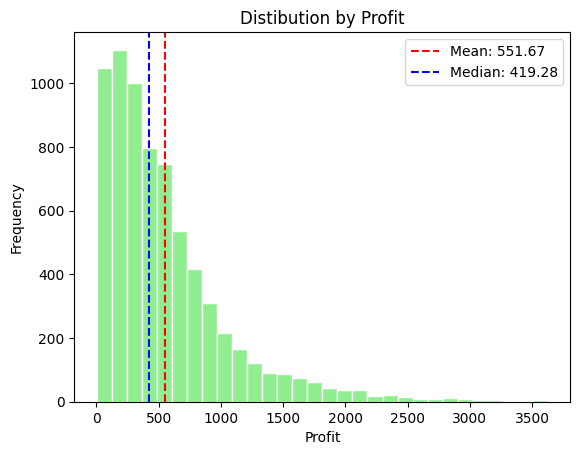

In [66]:
#Calculate States
mean_p= fact_sales_transaction["profit"].mean()
median_p= fact_sales_transaction["profit"].median()

print("Mean:", mean_p)
print("Median:", median_p)

#Visualization
plt.hist(fact_sales_transaction["profit"],bins=30, color="lightgreen",edgecolor="white")

#lines for mean and median
plt.axvline(mean_p, color='red', linestyle='dashed', label=f'Mean: {mean_p:.2f}')
plt.axvline(median_p, color="blue", linestyle="dashed", label=f"Median: {median_p:.2f}")

plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Distibution by Profit")
plt.legend()
plt.show()

Since the Mean is greater than the Median, the distribution has a **"long tail"** stretching toward the higher values on the **right side** of the graph.

#9. Identify outliers in sales and profit — are they valid or errors?

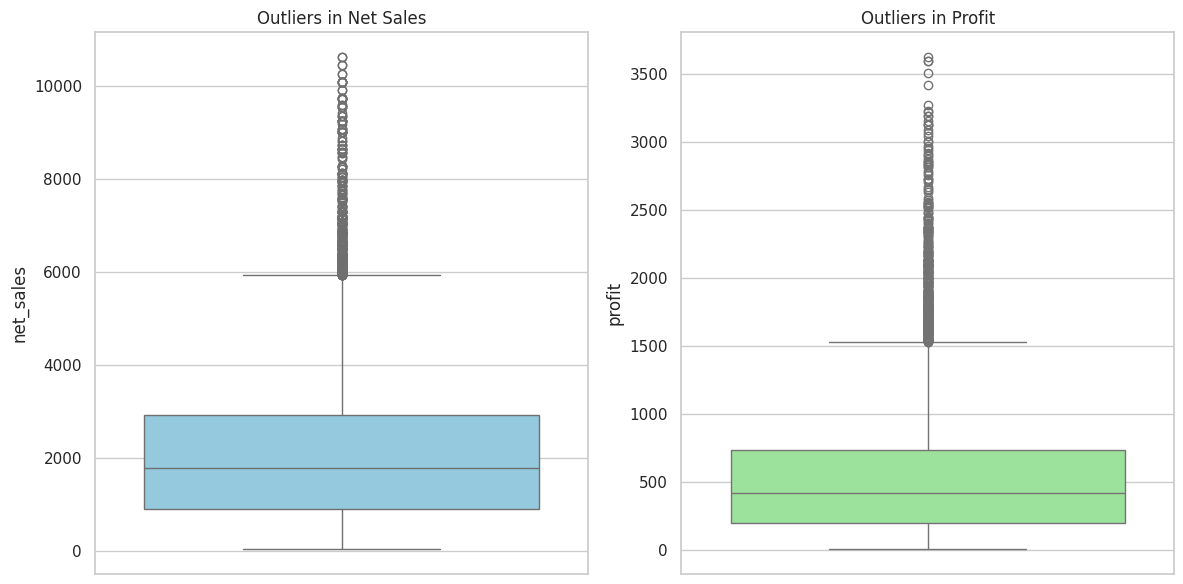

In [67]:
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes =plt.subplots(1,2, figsize=(12,6))

# Boxplot for Net Sales
sns.boxplot(y=fact_sales_transaction['net_sales'], ax=axes[0], color='skyblue')
axes[0].set_title('Outliers in Net Sales')

# Boxplot for Profit
sns.boxplot(y=fact_sales_transaction['profit'], ax=axes[1], color='lightgreen')
axes[1].set_title('Outliers in Profit')

plt.tight_layout()
plt.savefig('sales_profit_boxplots.png')

#10. What is the most common order quantity?

In [70]:
most_common= fact_sales_transaction["quantity"].mode()[0]
count= (fact_sales_transaction["quantity"]== most_common).sum()

print("Most common order quantity:", count)
print("Quantity appearing time:", most_common)

Most common order quantity: 141
Quantity appearing time: 25


#11. What discount levels are most frequently used?

In [72]:
fact_sales_transaction['discount_pct'] = fact_sales_transaction['discount_pct'].fillna(0.0)

# Count how many times each discount appears
discount_summary = fact_sales_transaction['discount_pct'].value_counts().sort_index()

print("Usage Frequency by Discount Level:")
print(discount_summary)

Usage Frequency by Discount Level:
discount_pct
0.0     3146
5.0     1748
10.0    1391
15.0     715
Name: count, dtype: int64
